# **Hollywood Age Gaps Dataset EDA Analysis**

Unsupervised and Unstructured Machine Learning (BA 820 A1)

Team 11: Anna Baldzikowski, Sambisha Godi, Maggie Croghan, Allison Kramer

**So every EDA visualization should answer one of these questions:**

*   Are there groups of similar observations?
*   Are there patterns that vary together?
*   Are there outliers or extreme cases?
*   Are there latent segments that might exist?
*   Is the data well-behaved or skewed in ways that matter?

# **1. Uploading / Mounting Dataset**

In [4]:
# Mounting Google Drive

from google.colab import data_table
from google.colab import drive

data_table.enable_dataframe_formatter()

# Access Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the Data - Hollywood Age Gaps

import pandas as pd
import numpy as np

#Allisons Path:
age_data = pd.read_csv('/content/drive/MyDrive/MSBA Spring 2026/Unsupervised Machine Learning/Project/age_gaps.csv')

#Maggies Path:


# **2. Information about "Age Data" Table**

In [6]:
age_data.head()

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


In [7]:
age_data.describe()

,release_year,age_difference,couple_number,actor_1_age,actor_2_age
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,2000.799134,10.424242,1.398268,40.635498,30.211255
std,16.365819,8.511086,0.754419,10.424173,7.495952
min,1935.000000,0.000000,1.000000,18.000000,17.000000
25%,1997.000000,4.000000,1.000000,33.000000,25.000000
50%,2004.000000,8.000000,1.000000,39.000000,29.000000
75%,2012.000000,15.000000,2.000000,47.000000,34.000000
max,2022.000000,52.000000,7.000000,81.000000,68.000000


In [8]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_name          1155 non-null   object
 1   release_year        1155 non-null   int64 
 2   director            1155 non-null   object
 3   age_difference      1155 non-null   int64 
 4   couple_number       1155 non-null   int64 
 5   actor_1_name        1155 non-null   object
 6   actor_2_name        1155 non-null   object
 7   character_1_gender  1155 non-null   object
 8   character_2_gender  1155 non-null   object
 9   actor_1_birthdate   1155 non-null   object
 10  actor_2_birthdate   1155 non-null   object
 11  actor_1_age         1155 non-null   int64 
 12  actor_2_age         1155 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 117.4+ KB


In [11]:
age_data.shape

(1155, 13)

# **3. EDA (Exploratory Data Analysis)**

## **EDA 1: Distribution of Age Differences**

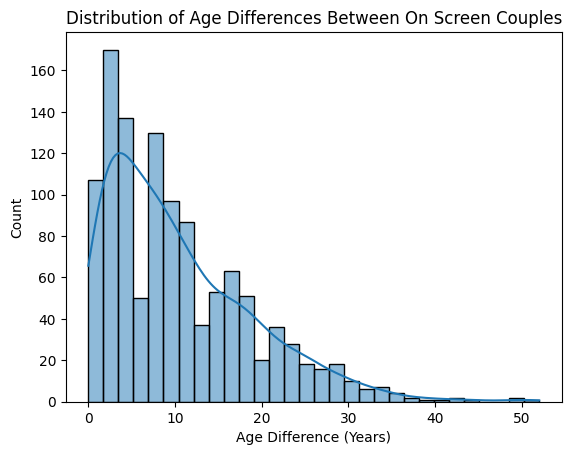

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(age_data['age_difference'], bins=30, kde=True)
plt.title("Distribution of Age Differences Between On Screen Couples")
plt.xlabel("Age Difference (Years)")
plt.show()

**Analysis:** This plot shows what age gaps are most common in on-screen couples. It helps answer whether Hollywood typically portrays couples with similar ages or relies on a small number of highly exaggerated age gaps.

**Results:** Most on screen couples have relatively small age gaps, with a long right tail showing a few extreme cases.

## **EDA 2: Age Difference by Character Gender Pairing**

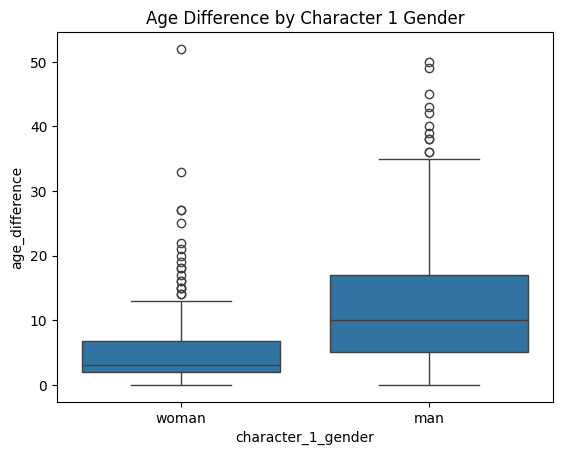

In [ ]:
sns.boxplot(
    data=age_data,
    x='character_1_gender',
    y='age_difference'
)
plt.title("Age Difference by Character 1 Gender")
plt.show()

**Analysis:** This visualization compares age gaps across gender pairings. It helps explore whether gender plays a role in how age disparities are represented in film relationships.

**Results:** Age gaps tend to be larger when the male character is older compared to when the female character is older.

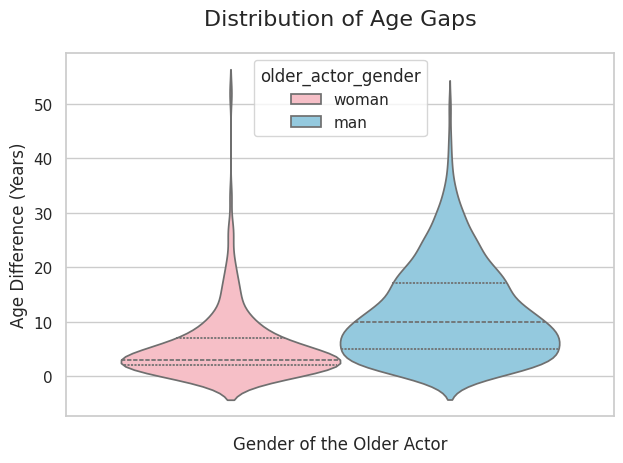

In [ ]:
sns.set_theme(style="whitegrid")

ax = sns.violinplot(
    data=age_data,
    hue='older_actor_gender',
    y='age_difference',
    palette={"man": "skyblue", "woman": "lightpink"},
    inner="quartile"
)

plt.title("Distribution of Age Gaps", fontsize=16, pad=20)
plt.xlabel("Gender of the Older Actor", fontsize=12)
plt.ylabel("Age Difference (Years)", fontsize=12)


plt.tight_layout()
plt.show()

## **EDA 3: Age Difference Over Time**

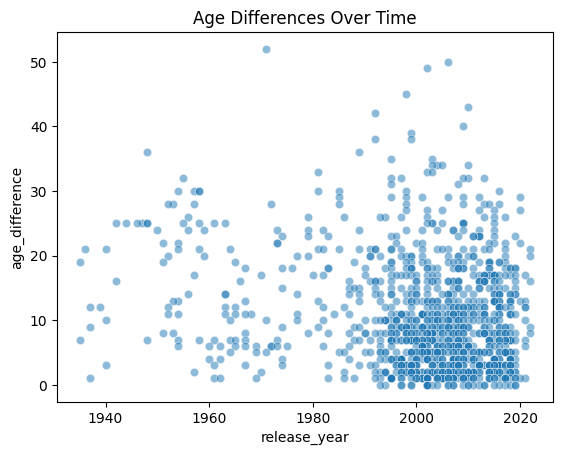

In [ ]:
sns.scatterplot(
    data=age_data,
    x='release_year',
    y='age_difference',
    alpha=0.5
)
plt.title("Age Differences Over Time")
plt.show()

**Analysis:** This plot allows us to examine whether age gaps in on-screen couples have changed over time. It helps address whether casting practices have evolved or if large age differences remain consistent across different film eras.

**Result:** Age gaps appear across all time periods, with extreme gaps present in both older and more recent films.

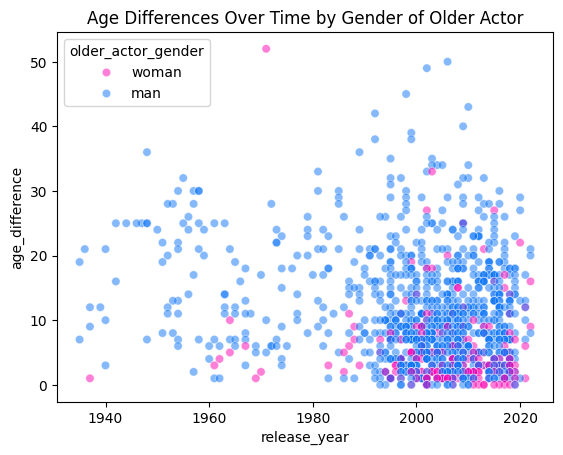

In [ ]:
age_data['older_actor_gender'] = np.where(
    age_data['actor_1_age'] > age_data['actor_2_age'],
    age_data['character_1_gender'],
    age_data['character_2_gender']
)

sns.scatterplot(
    data=age_data,
    x='release_year',
    y='age_difference',
    hue='older_actor_gender',
    palette={"man": "#0d75f8", "woman": "#fe01b1"},
    alpha=0.5
)
plt.title("Age Differences Over Time by Gender of Older Actor")
plt.show()

**Analysis:** This plot takes a closer examination of age gaps over time by differentiating couples by the gender of the older actor. This allows us to look at how gender plays a role in casting trends and how the role of gender in age gaps has evolved over time.

**Result:** On-screen couples where the man is older dominate movies across all time periods, but couples where the woman is older have become more prevalent in the past 20 years. While a majority of older female couples are concentrated in small age gaps (<5 years difference), recent years have seen large age gaps (10+ years) in older female couples that, with the exception of one film, were previously unseen prior to 2000.

## **EDA 4: Top 10 Largest Age Gaps in Film Couples**

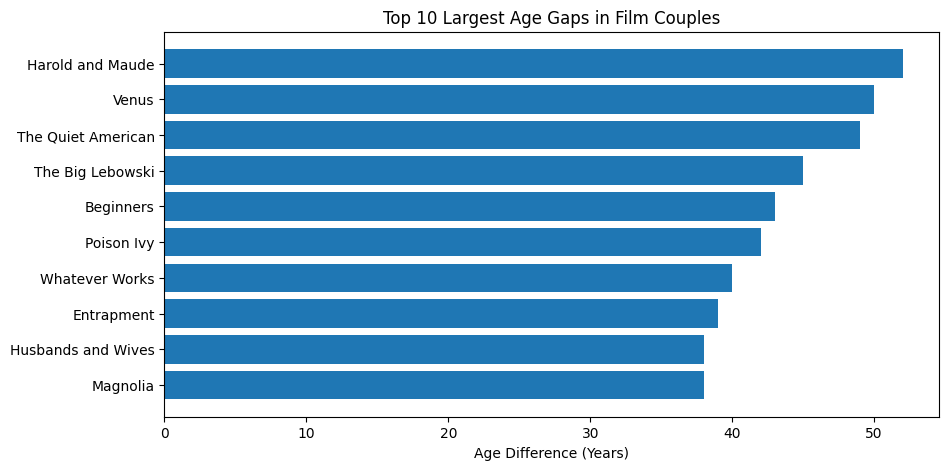

In [ ]:
extreme_gaps = age_data.sort_values('age_difference', ascending=False)

top_extremes = extreme_gaps.head(10)

plt.figure(figsize=(10, 5))
plt.barh(
    top_extremes['movie_name'],
    top_extremes['age_difference']
)
plt.xlabel("Age Difference (Years)")
plt.title("Top 10 Largest Age Gaps in Film Couples")
plt.gca().invert_yaxis()
plt.show()

**Analysis:** This identifies the most extreme portrayals and shows how far age disparities can extend in film relationships.

**Results:** The largest observed age gap in the dataset is around 50 years, with several films showing gaps above 40 years.

## **EDA 5: Direction of Age Gap by Gender Pairing**

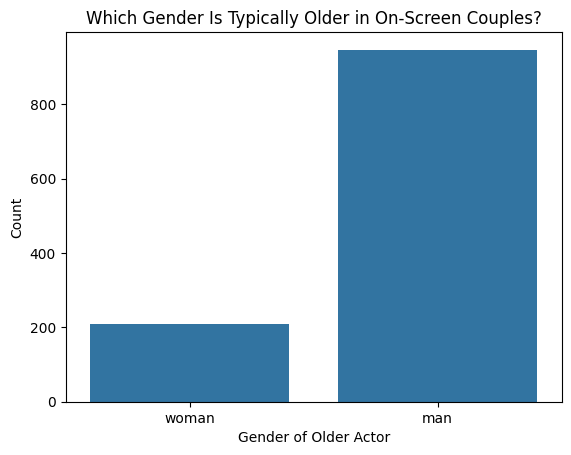

In [ ]:
age_data['older_actor_gender'] = np.where(
    age_data['actor_1_age'] > age_data['actor_2_age'],
    age_data['character_1_gender'],
    age_data['character_2_gender']
)
sns.countplot(
    data=age_data,
    x='older_actor_gender'
)
plt.title("Which Gender Is Typically Older in On-Screen Couples?")
plt.xlabel("Gender of Older Actor")
plt.ylabel("Count")
plt.show()


**Analysis:** This plot clearly shows which gender more often appears as the older partner in on screen couples. It helps answer a core domain question about whether films tend to portray men as older than their romantic counterparts.

**Results:** In the majority of on-screen couples, the male actor is older than the female actor.

## **EDA 6: Age Gaps by Director**

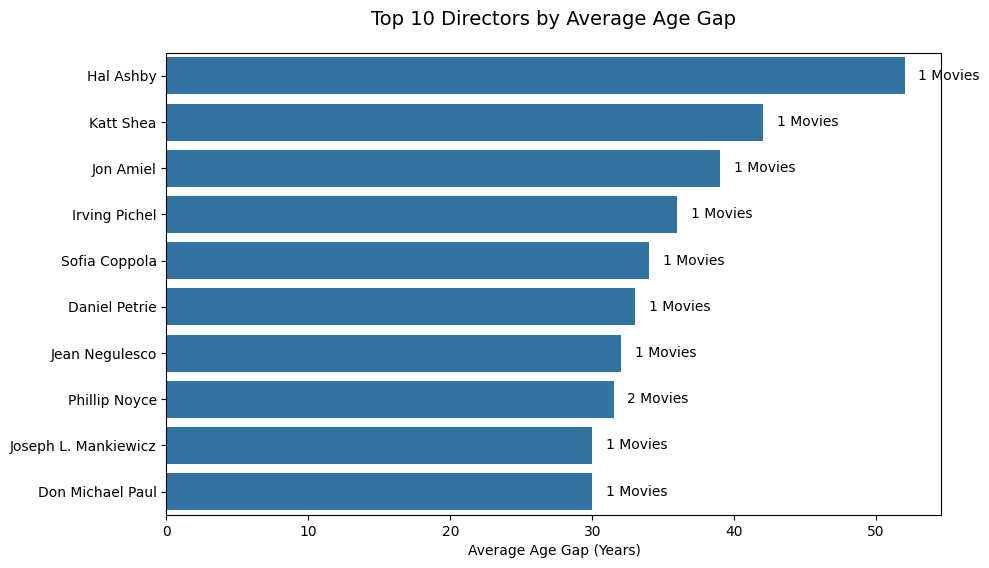

In [ ]:
director_stats = age_data.groupby("director").agg(
    avg_gap=('age_difference', 'mean'),
    num_movies=('age_difference', 'count')
).sort_values("avg_gap", ascending=False).head(10).reset_index()


plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=director_stats,
    x="avg_gap",
    y="director"
)

movie_counts = [f"{int(count)} Movies" for count in director_stats["num_movies"]]
ax.bar_label(ax.containers[0], labels=movie_counts, padding=10)

plt.title("Top 10 Directors by Average Age Gap", fontsize=14, pad=20)
plt.xlabel("Average Age Gap (Years)")
plt.ylabel("")

plt.show()

**Analysis:** This identifies the directors who have cast the largest age gap couples, on average.

**Results:** The largest observed age gaps between 50 and 30 years, indicating that most directors have an average age gap of less than 30 years.

## **EDA 7: Average Age Gaps Over Time**

Text(0.5, 1.0, '10-Year Rolling Average of Hollywood Age Gaps')

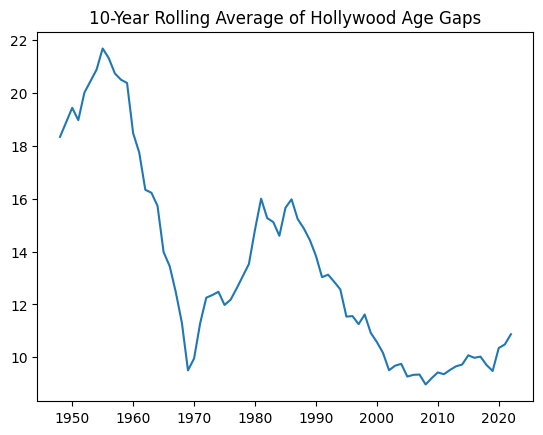

In [ ]:
age_trends = age_data.groupby('release_year')['age_difference'].mean().rolling(window=10).mean()

plt.plot(age_trends.index, age_trends.values)
plt.title("10-Year Rolling Average of Hollywood Age Gaps")

**Analysis:** This graph looks at the rolling average of age gaps over time to better visualize this trend over time.

**Results:** Average age gaps were the highest in 50s and 60s and the lowest in the late 2000s. The dip in age gap couples around 1970 is an interesting departure from intution, as well as the recent increase in age gaps after the the steady decline between 1985 and 2010.

## **EDA 8: Queer Couples**

/tmp/ipython-input-3550733939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queer_couples['release_year_bucket'] = pd.cut(queer_couples['release_year'], bins=[1995, 2005, 2015, 2025], labels=['1995-2005', '2005-2015', '2015-2025'])


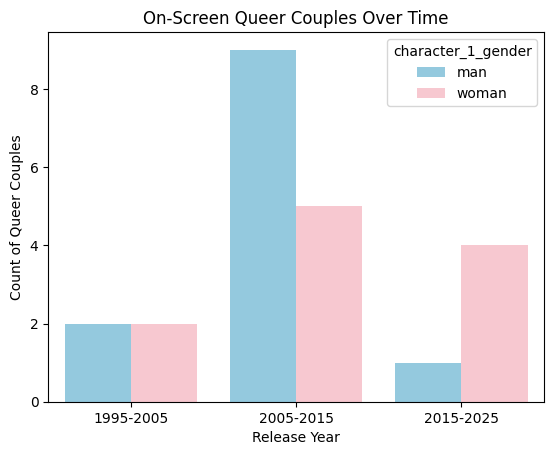

In [ ]:
queer_couples = age_data[age_data['character_1_gender'] == age_data['character_2_gender']]

queer_couples['release_year_bucket'] = pd.cut(queer_couples['release_year'], bins=[1995, 2005, 2015, 2025], labels=['1995-2005', '2005-2015', '2015-2025'])

sns.countplot(
    data=queer_couples,
    x='release_year_bucket',
    hue='character_1_gender',
    palette={"man": "skyblue", "woman": "pink"}
)
plt.title("Prominance of On-Screen Queer Couples Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count of Queer Couples")
plt.show()

**Analysis:** This graph looks at prominance of queer couples in movies across different 10-year buckets.

**Results:** The representation of queer couples in movies is very limited, at least for the movies included in this data set. No queer couples appeared until the late 90s, and there was a small increase between 2005 and 2015. Male queer couples and female queer couples had a similar number of apparences across the entire dataset.

## **EDA 9: Age Gaps Across Ages**

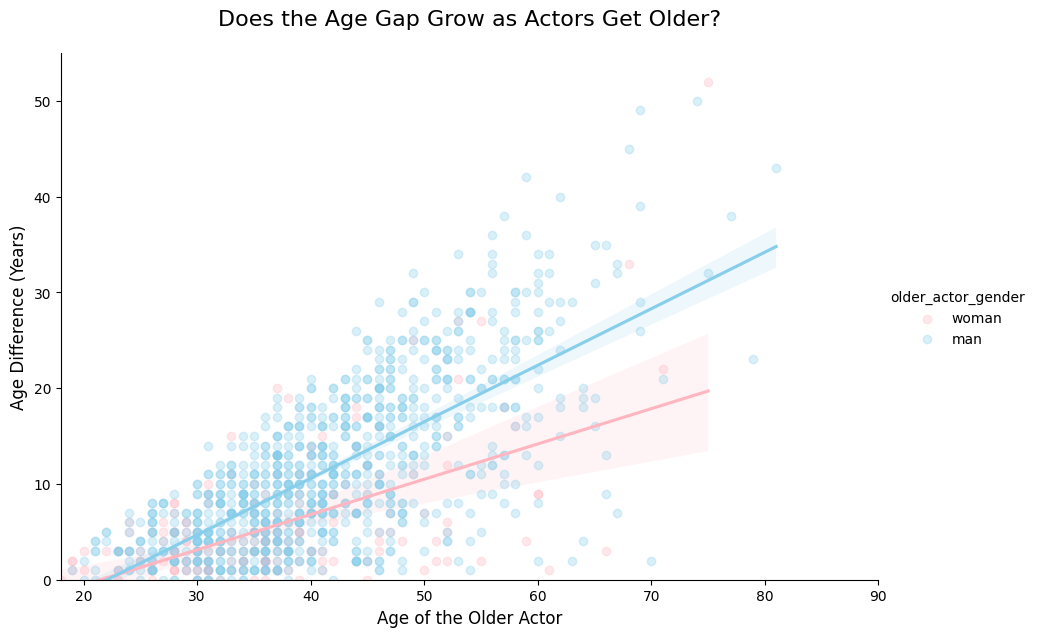

In [ ]:
g = sns.lmplot(
    data=age_data,
    x='actor_1_age',
    y='age_difference',
    hue='older_actor_gender',
    palette={'man': 'skyblue', 'woman': 'lightpink'},
    scatter_kws={'alpha': 0.3},
    height=6,
    aspect=1.5
)

plt.title("Does the Age Gap Grow as Actors Get Older?", fontsize=16, pad=20)
plt.xlabel("Age of the Older Actor", fontsize=12)
plt.ylabel("Age Difference (Years)", fontsize=12)

plt.xlim(18, 90)
plt.ylim(0, 55)

plt.show()

**Analysis:** This visualization explores the relationship between an actor's age and the size of the age gap in their on-screen relationships. This allows us to examine if actors tend to be paired with increasingly younger partners as they age, and whether this age gap trend differs between men and women.

**Results:** There is a clear positive correlation between the age of the older actor and the size of the age gap, particularly for men. The trend for women is less aggressive, suggesting that when women are the older partner, the age difference remains more conservative on average. However, women aslo have a greater variance of gaps as they age, possibly due to the smaller frequency of older women couples.

## **EDA 10: Actor Ages Across Time**

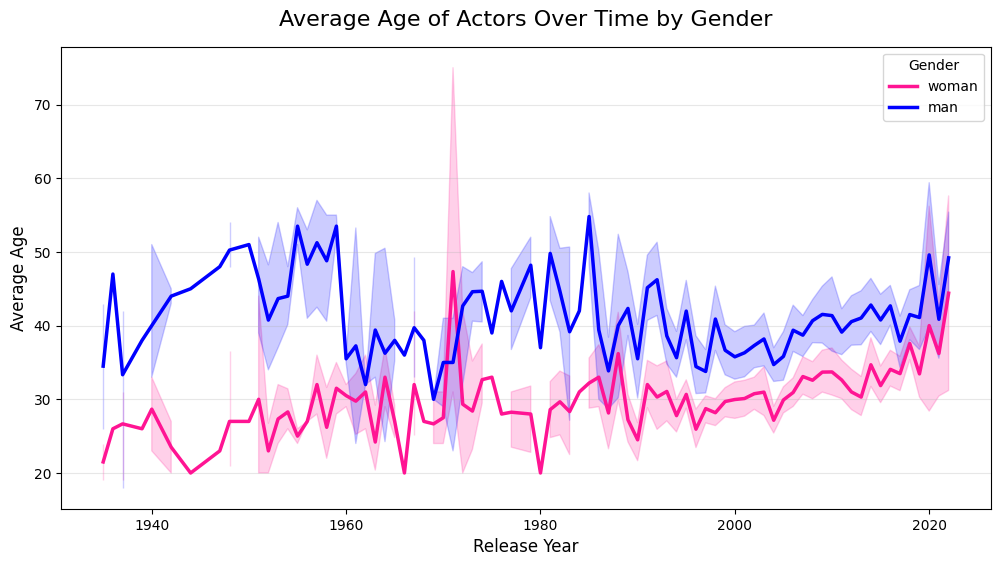

In [ ]:
actor1 = age_data[['release_year', 'actor_1_age', 'character_1_gender']].rename(
    columns={'actor_1_age': 'age', 'character_1_gender': 'gender'}
)
actor2 = age_data[['release_year', 'actor_2_age', 'character_2_gender']].rename(
    columns={'actor_2_age': 'age', 'character_2_gender': 'gender'}
)
actors_long = pd.concat([actor1, actor2])

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=actors_long,
    x='release_year',
    y='age',
    hue='gender',
    palette={'man': 'blue', 'woman': 'deeppink'},
    linewidth=2.5
)

plt.title("Average Age of Actors Over Time by Gender", fontsize=16, pad=15)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.legend(title="Gender")
plt.grid(axis='y', alpha=0.3)


plt.show()

**Analysis:** This line chart tracks the average age of male and female actors in romantic roles from the 1920s to the present. This allows us to examine the industry's preference for specific age ranges and how it has shifted over time for men and women.

**Results:** Throughout the entire date range, the average age for male actors has consistently remained higher than that of female actors. However, the average age of female actors has seen a slow but steady increase since the 1940s, in turn decreasing the average age gap between male and female actors.